---
# How does the covariance matrix $\Sigma$ determine the shape of the gaussian probability distribution function?
---

In this script, we show several examples of 2-D gaussian probability distribution functions (PDF).

In its matrix-form, the equation for the 2-D gausian PDF reads like this: 

<blockquote>  $P(\bf{x}) = \frac{1}{2\pi |\Sigma|^{0.5}} \exp{[-\frac{1}{2}(\bf{x}-\bf{\mu})^\top \Sigma^{-1} (\bf{x}-\bf{\mu})]}$  </blockquote>

where 

<blockquote> 
$
\begin{align}
\bf{x} &= [x_{1} x_{2}]^\top \\
\bf{\mu} &= [\mu_{1} \mu_{2}]^\top  \\
\Sigma &= \begin{pmatrix} \sigma_{x_{1}}^2 & \rho\sigma_{x_{1}}\sigma_{x_{2}} \\ \rho\sigma_{x_{1}}\sigma_{x_{2}} & \sigma_{x_{2}}^2 \end{pmatrix}
\end{align}
$                
</blockquote>

and where $\rho$ is the correlation factor between the $x_{1}$ and $x_{2}$ data. 

As shown below, the shape of the PDF is entirely determined by the values of the 
standard deviations $\sigma_{x_{1}}$, $\sigma_{x_{2}}$ and the correlation factor $\rho$. 


In [1]:
print(__doc__)

# Author: Pierre Gravel <pierre.gravel@iid.ulaval.ca>
# License: BSD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

import seaborn as sns
sns.set(color_codes=True)

# Used for reproductibility of the results
np.random.seed(43)

Automatically created module for IPython interactive environment


Let us first define the printing function that we use to show the PDF.

In [2]:
def display_pdf(Sigma, text, ax):
    # The PDF is centered at the origin
    Mu = [0.,0.]
    
    # Generate a spatial grid where the PDF will be evaluated locally
    x_min, x_max = -2., 2.
    y_min, y_max = -2., 2.
    h = 0.01
    x, y = np.mgrid[x_min:x_max:h, y_min:y_max:h]
    pos = np.dstack((x, y))
    
    # Generator for the 2-D gaussian PDF 
    rv = multivariate_normal(Mu, Sigma)

    # Display 2-D filled contours
    cm = plt.get_cmap('viridis')
    ax.contourf(x, y, rv.pdf(pos),cmap=cm)

    # Display the origin of the PDF
    ax.text(0., 0., '$\mu$', horizontalalignment='center', verticalalignment='center', fontsize=20, color='red')

    # Display the PDF specifications
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.99)
    ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
    
    ax.set_xlabel('$x_{1}$',fontsize=18)
    ax.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
    
    ax.yaxis.set_label_coords(-0.1,0.5)
    ax.xaxis.set_label_coords(0.5, -0.05)        


Here are some examples of PDF with isotropy, anisotropy and correlation:

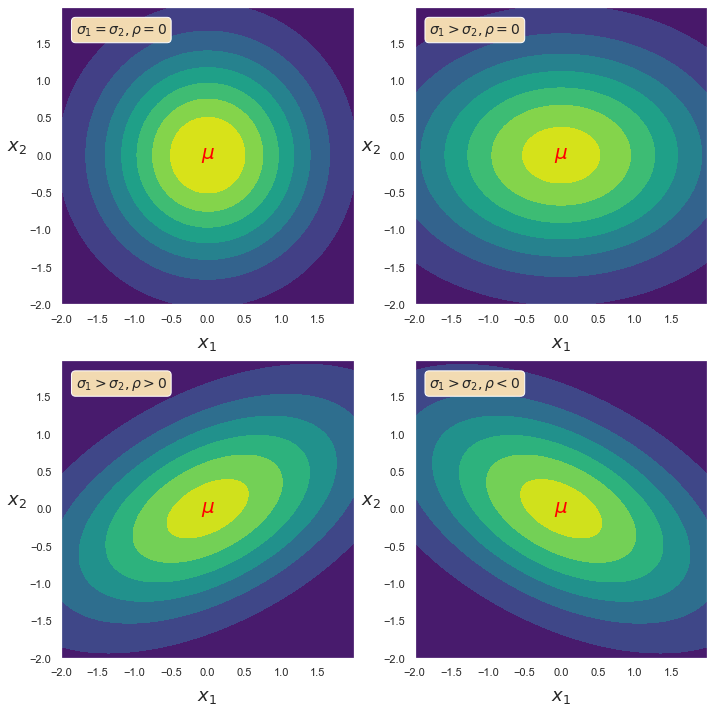

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))

# ISOTROPIC distribution
Sigma = [(1., 0.), (0., 1.)]
text = r'$\sigma_{1} =  \sigma_{2}, \rho = 0$'
display_pdf(Sigma, text, ax1)
ax1.yaxis.set_label_coords(-0.15,0.5)
ax1.xaxis.set_label_coords(0.5, -0.1)

# ANISOTROPIC and UNCORRELATED distribution
Sigma = [(2., 0.), (0., 1.)]
text = r'$\sigma_{1} >  \sigma_{2}, \rho = 0$'
display_pdf(Sigma, text, ax2)
ax2.yaxis.set_label_coords(-0.15,0.5)
ax2.xaxis.set_label_coords(0.5, -0.1)

# ANISOTROPIC and positively CORRELATED distribution
Sigma = [(2., 0.7), (0.7, 1.)]
text = r'$\sigma_{1} >  \sigma_{2}, \rho > 0$'
display_pdf(Sigma, text, ax3)
ax3.yaxis.set_label_coords(-0.15,0.5)
ax3.xaxis.set_label_coords(0.5, -0.1)

# ANISOTROPIC and negatively CORRELATED distribution
Sigma = [(2., -0.7), (-0.7, 1.)]
text = r'$\sigma_{1}  > \sigma_{2}, \rho < 0$'
display_pdf(Sigma, text, ax4)
ax4.yaxis.set_label_coords(-0.15,0.5)
ax4.xaxis.set_label_coords(0.5, -0.1)
fig.tight_layout()

plt.savefig('Examples_of_PDF_isotropy_and_correlation.png')
plt.savefig('Examples_of_PDF_isotropy_and_correlation.pdf')
plt.show()